# K-means Clustering and Principal Component Analysis


In this exercise, we are implementing K-Means algorithm to compress an image. Next comes Principal Component Analysis for lower-dimentional representation of face images.

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# from IPython.display import HTML, display, clear_output

# try:
#     pyplot.rcParams["animation.html"] = "jshtml"
# except ValueError:
#     pyplot.rcParams["animation.html"] = "html5"

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat
#standardization
from sklearn.preprocessing import StandardScaler

# library written for this exercise providing additional functions for assignment submission, and others
#import utils
%matplotlib inline

## 1 K-means Clustering

In this exercise, we will implement K-means algorithm and use it for image compression. We will first start on an example 2D dataset that will help us gain an intuition of how the K-means algorithm works. After
that, we wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

### 1.1 Implementing K-means

The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set $\{x^{(1)} , \cdots, x^{(m)}\}$ (where $x^{(i)} \in \mathbb{R}^n$), and want to group the data into a few cohesive “clusters”. The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The K-means algorithm is as follows:

```python
centroids = kMeansInitCentroids(X, K)
for i in range(iterations):
    # Cluster assignment step: Assign each data point to the
    # closest centroid. idx[i] corresponds to cˆ(i), the index
    # of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids)
    
    # Move centroid step: Compute means based on centroid
    # assignments
    centroids = computeMeans(X, idx, K)
```

The inner-loop of the algorithm repeatedly carries out two steps: (1) Assigning each training example $x^{(i)}$ to its closest centroid, and (2) Recomputing the mean of each centroid using the points assigned to it. The K-means algorithm will always converge to some final set of means for the centroids. Note that the converged solution may not always be ideal and depends on the initial setting of the centroids. Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion). You will implement the two phases of the K-means algorithm separately
in the next sections.

In [2]:
#load data
data = loadmat(os.path.join('Data', 'ex7data2.mat'))
X = data['X']
print(X.shape)

(300, 2)


In [3]:
def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    

    """
    #set K 
    K = centroids.shape[0]
    #array of cluster indexes for examples X
    idx = np.zeros(X.shape[0], dtype=np.int32)
    #number of training example
    m = X.shape[0]
    
    #difference between each feature vector x in X and cluster centroids
    diff = np.repeat(X, axis=0, repeats=K) - np.array([centroids] * m).reshape((-1, X.shape[1]))
    #distance between x's and cluster centroids
    distance = np.linalg.norm(diff, axis=1).reshape(-1, K)
    #cluster assignment
    idx = np.argmin(distance, axis=1)
    
    return idx

In [4]:
# Select an initial set of centroids
K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


### 1.1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid $k$ we set

$$ \mu_k := \frac{1}{\left| C_k\right|} \sum_{i \in C_k} x^{(i)}$$

where $C_k$ is the set of examples that are assigned to centroid $k$. Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2} \left( x^{(3)} + x^{(5)} \right)$.

In [5]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    

    """
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))


    # ====================== YOUR CODE HERE ======================

    for k in range(K):
        centroids[k, :] = np.mean(X[idx==k, :], axis=0)
    
    # =============================================================
    return centroids

In [6]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


In [7]:
def plotProgressKmeans(i, X, centroid_history, idx_history, K):
    """
    A helper function that displays the progress of k-Means as it is running. It is intended for use
    only with 2D data. It plots data points with colors assigned to each centroid. With the
    previous centroids, it also plots a line between the previous locations and current locations
    of the centroids.

    Parameters
    ----------
    i : int
        Current iteration number of k-means. Used for matplotlib animation function.

    X : array_like
        The dataset, which is a matrix (m x n). Note since the plot only supports 2D data, n should
        be equal to 2.

    centroid_history : list
        A list of computed centroids for all iteration.

    idx_history : list
        A list of computed assigned indices for all iterations.
    """    
    cmap = plt.cm.PiYG
    norm = mpl.colors.Normalize(vmin=0, vmax=2)
    plt.gcf().clf()
    for k in range(K):
        current_centroid = np.stack([c[k, :] for c in centroid_history[:i]])
        plt.plot(current_centroid[:, 0], current_centroid[:,1], '-k', marker='X', mfc=cmap(norm(k)), ms=12, mec='k')
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=idx_history[i-1], cmap=cmap, s=40)   
        plt.title('Iteration {:d}'.format(i), fontsize=30)

In [8]:
#K x n array of K centroids 
#with n numnber of dimentions for each data point or number of features
centroids = np.array([[3, 3], [6, 2], [8, 5]])
#number of clusters
K = centroids.shape[0]
#number of training examples
m = X.shape[0]
plot_progress = True
#number of iteration
max_iter = 10
#history of clusters assigned and centroids computed
idx_history = []
centroid_history = []

plot_progress = True

for i in range(max_iter):
    idx = findClosestCentroids(X, centroids)
    
    if plot_progress:
        idx_history.append(idx)
        centroid_history.append(centroids)
    
    centroids = computeCentroids(X, idx, K)
if plot_progress:
#     fig = plt.figure(figsize=(5, 5))
#     anim = mpl.animation.FuncAnimation(fig, 
#                                 func=plotProgressKmeans, 
#                                 frames=max_iter, 
#                                 repeat_delay=2,
#                                 fargs=(X, centroid_history, idx_history, K), 
#                                 interval=500)
    from ipywidgets import interact, fixed, IntSlider, Play, jslink, HBox, VBox

    slider=IntSlider(min=1, max=max_iter, step=1)
    play=Play(
    min=1,
    max=max_iter,
    step=1,
    interval=500,
    description="Press play",
    disabled=False)
    jslink((play, 'value'), (slider, 'value'))
    display(HBox([play]))
    interact(plotProgressKmeans, i=slider
             , X=fixed(X)
            , centroid_history=fixed(centroid_history), idx_history=fixed(idx_history), K=fixed(K))

ModuleNotFoundError: No module named 'ipywidgets'

In [9]:
#fit KMeans model using sklearn
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
mpl.cm.Accent

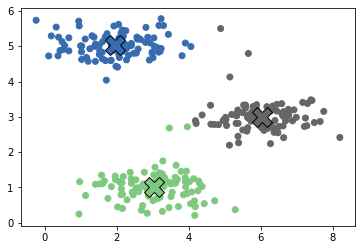

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o', cmap='Accent')
cmap=mpl.cm.Accent
norm = mpl.colors.Normalize(vmin=0, vmax=2)
for k in range(kmeans.cluster_centers_.shape[0]):
     plt.plot(kmeans.cluster_centers_[k, 0], kmeans.cluster_centers_[k, 1], '-Xk', ms=20, mfc=cmap(norm(k)))


### 1.3 Random initialization 

The initial assignments of centroids for the example dataset in the previous cell were designed so that we will see the same figure as that shown in the cell above. In practice, a good strategy for initializing the centroids is to select random examples from the training set.

In [12]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.
    
    Parameters
    ----------
    X : array_like 
        The dataset of size (m x n).
    
    K : int
        The number of clusters.
    
    Returns
    -------
    centroids : array_like
        Centroids of the clusters. This is a matrix of size (K x n).
    
    Instructions
    ------------
    You should set centroids to randomly chosen examples from the dataset X.
    """
    #dimension of input dataset
    m, n = X.shape
    
    #permutate X's indices
    rand_inds = np.random.permutation(X.shape[0])[:K]
    #randomly initialize cluster centroids
    centroids = X[rand_inds, :]
    
    return centroids
    

### 1.4 Image compression with K-means

In this exercise, you will apply K-means to image compression. We will use the image below as an example (property of Frank Wouters with permission to this class).

![](Data/bird_small.png)

In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often referred to as the RGB encoding. Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.

By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this exercise, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

#### 1.4.1 K-means on pixels

In python, images can be read in as follows:

```python
# Load 128x128 color image (bird_small.png)
img = mpl.image.imread(os.path.join('Data', 'bird_small.png'))

# We have already imported matplotlib as mpl at the beginning of this notebook.
```
This creates a three-dimensional matrix `A` whose first two indices identify a pixel position and whose last index represents red, green, or blue. For example, A[50, 33, 2] gives the blue intensity of the pixel at row 51 and column 34.

The code in the following cell first loads the image, and then reshapes it to create an m x 3 matrix of pixel colors (where m = 16384 = 128 x 128), and calls your K-means function on it.

After finding the top K = 16 colors to represent the image, you can now assign each pixel position to its closest centroid using the `findClosestCentroids` function. This allows you to represent the original image using the centroid assignments of each pixel. Notice that you have significantly reduced the number of bits that are required to describe the image. The original image required 24 bits for each one of the 128 x 128 pixel locations, resulting in total size of 128 x 128 x 24 = 393,216 bits. The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. The final number of bits used is therefore 16 x 24 + 128 x 128 x 4 = 65,920 bits, which corresponds to compressing the original image by about a factor of 6.

Finally, you can view the effects of the compression by reconstructing the image based only on the centroid assignments. Specifically, you can replace each pixel location with the mean of the centroid assigned to it. The figure below shows the reconstruction we obtained. 

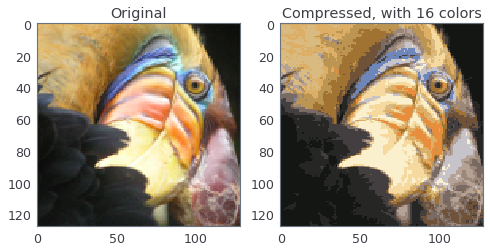 

Even though the resulting image retains most of the characteristics of the original, we also see some compression artifacts.

Run the following cell to compute the centroids and the centroid allocation of each pixel in the image.

Image shape: (128, 128, 3)


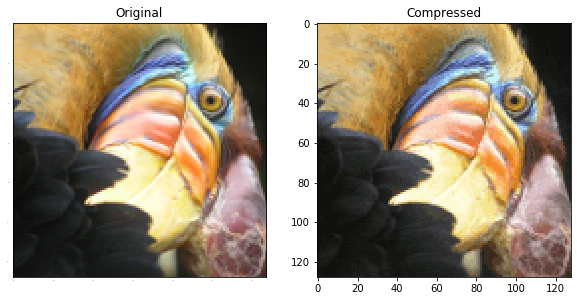

In [13]:
#number of color clusters we want to group the the pixel values in the given image
#we can play with different parameters later
K = 100
max_iters = 10

#load the image into an array of pixel values
image = plt.imread(os.path.join('Data', 'bird_small.png'))
#normalize the pixel array (value in 0~1 only)
image = image / 255
print('Image shape:', image.shape)
#reshape image into the array of dimension Nx3
#each row contains image pixel values for R, G, B intensity
X = image.reshape(-1, 3)

#implement Kmeans
kmeans = KMeans(K)
kmeans.fit(X)

#represent the original image using cluster centroids assigned to each pixel value
X_compressed = kmeans.cluster_centers_[kmeans.labels_, :]
#reshape X_compress into a 3-D array for image visualization
image_compressed = X_compressed.reshape(image.shape)

#plot original and compressed image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax = ax.flatten()
ax[0].imshow(image*255)
ax[0].set_title('Original')
ax[0].tick_params(axis='both', labelsize=0, length=0)

ax[1].imshow(image_compressed*255)
ax[1].set_title('Compressed');

In [14]:
ax[0].imshow(image*255)
ax[0].set_title('Original')
ax[0].tick_params(axis='both', length=0)

## 2 Principal Component Analysis

In this exercise, we will use principal component analysis (PCA) to perform dimensionality reduction. We will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

### 2.1 Example Dataset

To help us understand how PCA works, we will first start with a 2D dataset which has one direction of large variation and one of smaller variation. The cell below will plot the training data, also shown in here:

In this part of the exercise, we will visualize what happens when we use PCA to reduce the data from 2D to 1D. In practice, we might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

(50, 2)


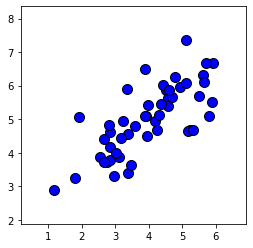

In [15]:
#load dataset into variable X
data = loadmat(os.path.join('Data', 'ex7data1.mat'))
X = data['X']
print(X.shape)
#visualize
plt.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
plt.gca().set_aspect('equal')
plt.axis([X[:, 0].min()-1, X[:, 0].max()+1, X[:, 1].min()-1, X[:, 1].max()+1]);

<a id="section3"></a>
### 2.2 Implementing PCA

In this part of the exercise, you will implement PCA. PCA consists of two computational steps: 

1. Compute the covariance matrix of the data.
2. Use SVD (in python we use numpy's implementation `np.linalg.svd`) to compute the eigenvectors $U_1$, $U_2$, $\dots$, $U_n$. These will correspond to the principal components of variation in the data.

First, you should compute the covariance matrix of the data, which is given by:

$$ \Sigma = \frac{1}{m} X^T X$$

where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator.

In [16]:
def pca(X):
    """
    Implement PCA to return U as eigence vectors in and S as a vector of size n containing singular 
    
    Parameters:
    -----
    X: array-like
    Input dataset of dimension (mxn) - m: number of training examples, n: number of features
    
    Returns:
    -----
    U: array_like
    Matrix of eigen vectors
    S: array_like
    Vector of singular values
    """
    
    m, n = X.shape
    
    #covariance matrix of X
    X_cov = 1 / m * X.T @ X
    
    return np.linalg.svd(X_cov)[:2]

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.


Eigen Vectors: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Singular Values: [1.73553038 0.26446962]


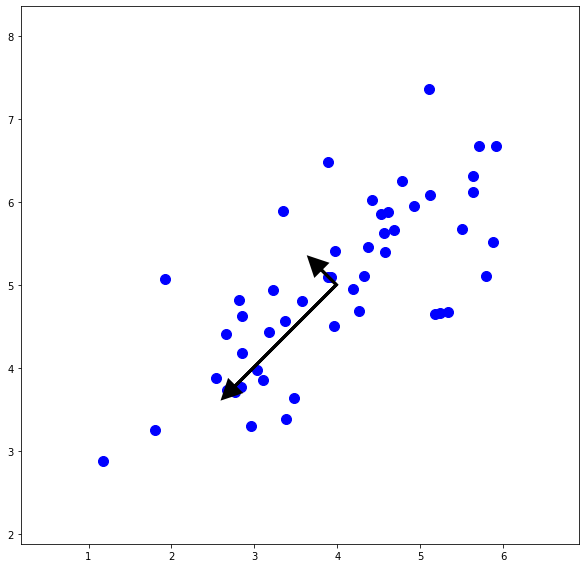

In [17]:
scaler = StandardScaler()
X_processed = scaler.fit_transform(X)
#find eigen vectors and singular values
U, S = pca(X_processed)
print("Eigen Vectors:",U)
print("Singular Values:",S)
#draw eigen vectors at the mean of data
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], s=100, c='b')
ax.set_aspect('equal')
ax.axis([X[:, 0].min()-1, X[:, 0].max()+1, X[:, 1].min()-1, X[:, 1].max()+1])
for i in range(U.shape[1]):
    ax.arrow(scaler.mean_[0], scaler.mean_[1], S[i] * U[i, 0], S[i] * U[i, 1],head_width=0.2, head_length=0.2, lw=3, fc='k')
plt.show()    

### 2.3 Dimensionality Reduction with PCA

After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and
project the example dataset into a 1-dimensional space. In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

<a id="section4"></a>

#### 2.3.1 Projecting the data onto the principal components
We are given the dataset X, principal components U, desired number of dimensions K. We then project X on K-dimensional space from orginal n-dimension.  We should project each example in `X` onto the top `K` components in `U`. Note that the top `K` components in `U` are given by the first `K` columns of `U`, that is `Ureduce = U[:, :K]`.

In [18]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only 
    on to the top K eigenvectors.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). The dataset is assumed to be 
        normalized.
    
    U : array_like
        The computed eigenvectors using PCA. This is a matrix of 
        shape (n x n). Each column in the matrix represents a single
        eigenvector (or a single principal component).
    
    K : int
        Number of dimensions to project onto. Must be smaller than n.
    
    Returns
    -------
    Z : array_like
        The projects of the dataset onto the top K eigenvectors. 
        This will be a matrix of shape (m x k).
    


    """

    Z = np.zeros((X.shape[0], K))
    Z = X @ U[:, :K]
    
    return Z

In [19]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_processed, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.496313
(this value should be about    : 1.481274)


<a id="section5"></a>
#### 2.3.2 Reconstructing an approximation of the data

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. Your task is to complete the function `recoverData` to project each example in `Z` back onto the original space and return the recovered approximation in `Xrec`.
<a id="recoverData"></a>

In [20]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the 
    projected data.
    
    Parameters
    ----------
    Z : array_like
        The reduced data after applying PCA. This is a matrix
        of shape (m x K).
    
    U : array_like
        The eigenvectors (principal components) computed by PCA.
        This is a matrix of shape (n x n) where each column represents
        a single eigenvector.
    
    K : int
        The number of principal components retained
        (should be less than n).
    
    Returns
    -------
    X_rec : array_like
        The recovered data after transformation back to the original 
        dataset space. This is a matrix of shape (m x n), where m is 
        the number of examples and n is the dimensions (number of
        features) of original datatset.
    
    """
    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    X_rec = Z @ U[:, :K].T   
    
    return X_rec

Approximation of the first example: [-1.058053 -1.058053]
       (this value should be about  [-1.047419 -1.047419])
[-0.5233130620222805, -1.058052792215479] [-1.5927925224086763, -1.058052792215478]


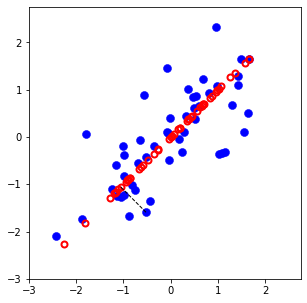

In [21]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_processed[:, 0], X_processed[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_processed, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)
    print([xnorm[0], xrec[0]], [xnorm[1], xrec[1]])
    #ax.plot(xnorm[0], xrec[0], 'ok', lw=10)
    break

### 2.4 Face Image Dataset

In this part of the exercise, we will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset `ex7faces.mat` contains a dataset `X` of face images, each $32 \times 32$ in grayscale. This dataset was based on a [cropped version](http://conradsanderson.id.au/lfwcrop/) of the [labeled faces in the wild](http://vis-www.cs.umass.edu/lfw/) dataset. Each row of `X` corresponds to one face image (a row vector of length 1024). 



In [22]:
def displayData(X, figsize=(8, 8)):
    if X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]
    elif X.ndim == 2:
        m, n = X.shape
    else:
        raise IndexError('Input should be 1 or 2 dimensional')
    nrows = int(m//10) + 1
    ncols = np.ceil(m / nrows).astype('int')
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.0025)
    for i in range(m):
        ax = fig.add_subplot(nrows,ncols, i+1)
        ax.imshow(X[i, :].reshape((32, 32), order='F'), cmap='gray')
        ax.axis('off')

ValueError: cannot reshape array of size 2 into shape (32,32)

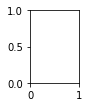

In [48]:
displayData(X[:102, :])

#### 2.4.1 PCA on Faces

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix `X`.  After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in `U` (each column) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset. 

The following cell will first normalize the dataset for you and then run your PCA code. Then, the first 36 principal components (conveniently called eigenfaces) that describe the largest variations are displayed. If you want, you can also change the code to display more principal components to see how they capture more and more details.

In [ ]:
#normalize data matrix X by subtracint mean from each feature and divide them by their std
X_norm = scaler.fit_transform(X)
#apply pca
U, S = pca(X_norm)
#visualize principal components from resulting matrix of eigenvectors
displayData(U[:, :100].T, (8, 8))

#### 2.4.2 Dimensionality Reduction

Now that we have computed the principal components for the face dataset, we can use it to reduce the dimension of the face dataset. This allows you to use our learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

The next cell will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}$. To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset.

In [ ]:
K = 20
#project the fact dataset onto K-dimension (dimensionality reduction)
Z = projectData(X, U, K)
#receover the dimension-reduced data back to the approximation of orginal data
X_rec = recoverData(Z, U, K)

#visualize original and recovered data
#project images onto K-dimensional space (K<n) using top K principal components or eigenvectors
#ORIGNAL DATA
displayData(X[:100, :])
plt.gcf().suptitle('Original faces')
#Recovered Data
displayData(X_rec[:100, :])
plt.gcf().suptitle('Recovered faces from approximation of %d-dimensional data'%(K))

### 2.5 Optional (ungraded) exercise: PCA for visualization

In the earlier K-means image compression exercise, we used the K-means algorithm in the 3-dimensional RGB space. We reduced each pixel of the RGB image to be represented by 16 clusters. In the next cell, we visualize the final pixel assignments in this 3D space. Each data point is colored according to the cluster it has been assigned to. We can drag your mouse on the figure to rotate and inspect this data in 3 dimensions.

In [ ]:
%matplotlib notebook
%matplotlib notebook

image = plt.imread(os.path.join('Data', 'bird_small.png'))
image = image / 255
image = image.reshape(-1, 3)

K = 16
kmeans = KMeans(n_clusters=K)
kmeans.fit(image)
rand_idx = np.random.choice(image.shape[0], size=1000)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[rand_idx, 0], X[rand_idx, 1], X[rand_idx, 2], c=[kmeans.labels_[rand_idx]], s=8**2)
ax.set_title('Image\'s pixeles are represented by 16 clusters of color')

In [ ]:
np.random.permutation??